In [42]:
# Importing necessary libraries
import dlib
import cv2
import matplotlib.pyplot as plt

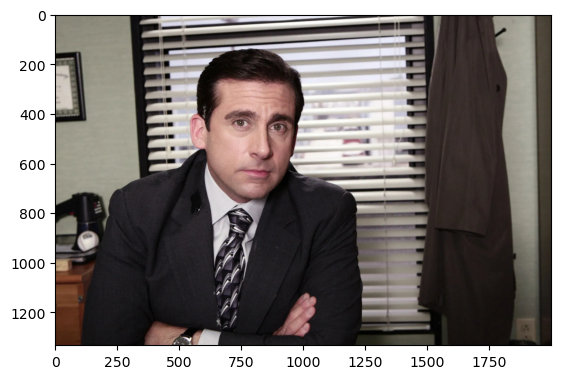

In [43]:
img = cv2.imread("img/steve.jpg")

# Convert the image to grayscale 
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [44]:
# Let's load dlib's built-in face detector
detector = dlib.get_frontal_face_detector()

In [45]:
# Running the face detector on the grayscale image
faces = detector(gray_img)

# Let’s check how many faces were detected
print(f"Number of faces detected: {len(faces)}")

Number of faces detected: 1


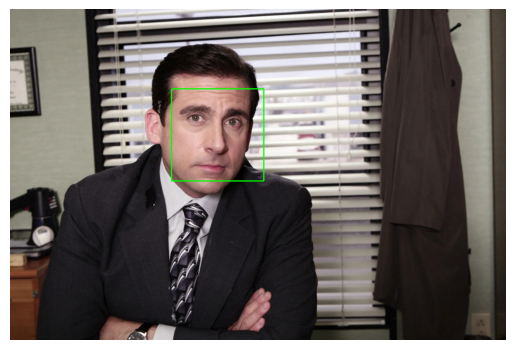

In [46]:
# Сopy of the original image
img_with_faces = img.copy()

# Loop through all detected faces and draw a rectangle around each
for i, face in enumerate(faces):
    # Get the coordinates for the bounding box (left, top, right, bottom)
    x1, y1, x2, y2 = (face.left(), face.top(), face.right(), face.bottom())
    
    # Draw a rectangle around the face 
    cv2.rectangle(img_with_faces, (x1, y1), (x2, y2), (0, 255, 0), 3)

# Let’s display the image with the bounding boxes around the faces
plt.imshow(cv2.cvtColor(img_with_faces, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Hide the axis
plt.show()

Number of faces detected in img/office3.jpg: 1
Number of faces detected in img/bubbahotep1.jpg: 2
Number of faces detected in img/hunter.jpg: 0
Number of faces detected in img/hunter2.jpg: 1
Number of faces detected in img/hunter3.jpg: 1
Number of faces detected in img/hunterdownpng.jpg: 0


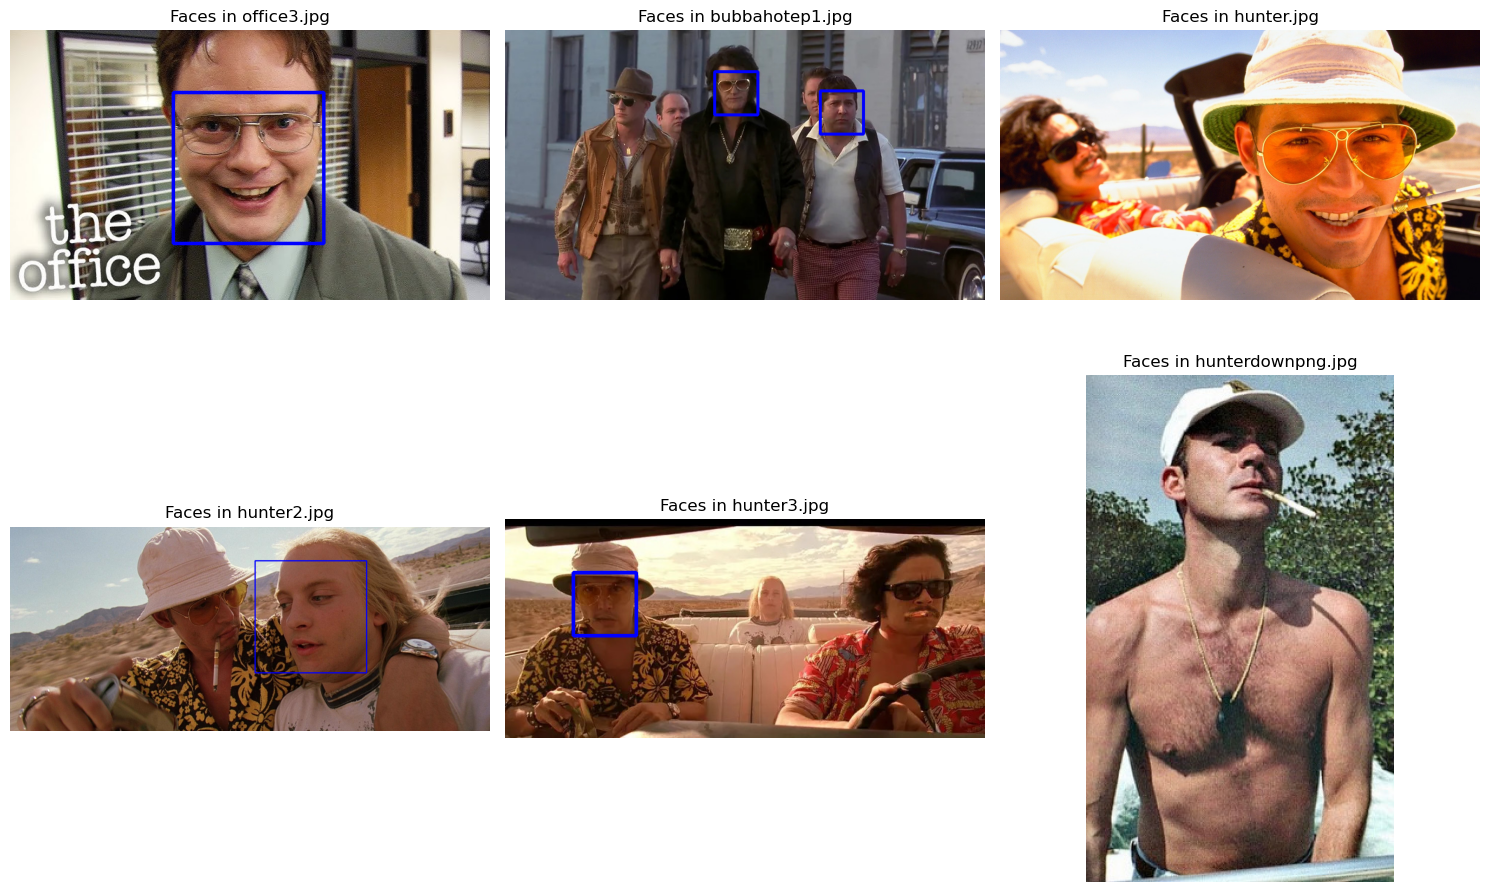

In [47]:
# List of image paths 
image_paths = [
    "img/office3.jpg",   
    "img/bubbahotep1.jpg", 
    "img/hunter.jpg",    
    "img/hunter2.jpg",  
    "img/hunter3.jpg",  
    # "img/huntergun.jpg"   
    "img/hunterdownpng.jpg"   
]

# Initialize face detector
detector = dlib.get_frontal_face_detector()

# Calculate the number of images
num_images = len(image_paths)

# Calculate the number of rows and columns for the subplot grid
cols = 3  
rows = (num_images + cols - 1) // cols  

# Create a plot with dynamic rows and columns based on the number of images
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))  

axes = axes.flatten()

# Loop over each image
for i, image_path in enumerate(image_paths):
    # Loading the image
    img = cv2.imread(image_path)
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Running the face detector on the image
    faces = detector(gray_img)

    # Let’s check how many faces the detector found in this image
    print(f"Number of faces detected in {image_path}: {len(faces)}")

    # Draw bounding boxes on the image
    img_with_faces = img.copy()
    for face in faces:
        x1, y1, x2, y2 = (face.left(), face.top(), face.right(), face.bottom())
        cv2.rectangle(img_with_faces, (x1, y1), (x2, y2), (255, 0, 0), 3)  # Blue color for variety

    # Display the image with faces highlighted
    ax = axes[i]  # Get the appropriate axis
    ax.imshow(cv2.cvtColor(img_with_faces, cv2.COLOR_BGR2RGB))
    ax.axis('off')  # Hide axes for clean display
    ax.set_title(f"Faces in {image_path.split('/')[-1]}")  # Set the title to the image name

for j in range(num_images, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


# Let's try DeepFace

Number of faces detected in img/office3.jpg: 1
Number of faces detected in img/bubbahotep1.jpg: 4
Number of faces detected in img/hunter.jpg: 0
Number of faces detected in img/hunter2.jpg: 0
Number of faces detected in img/hunter3.jpg: 1
Number of faces detected in img/huntergun.jpg: 2


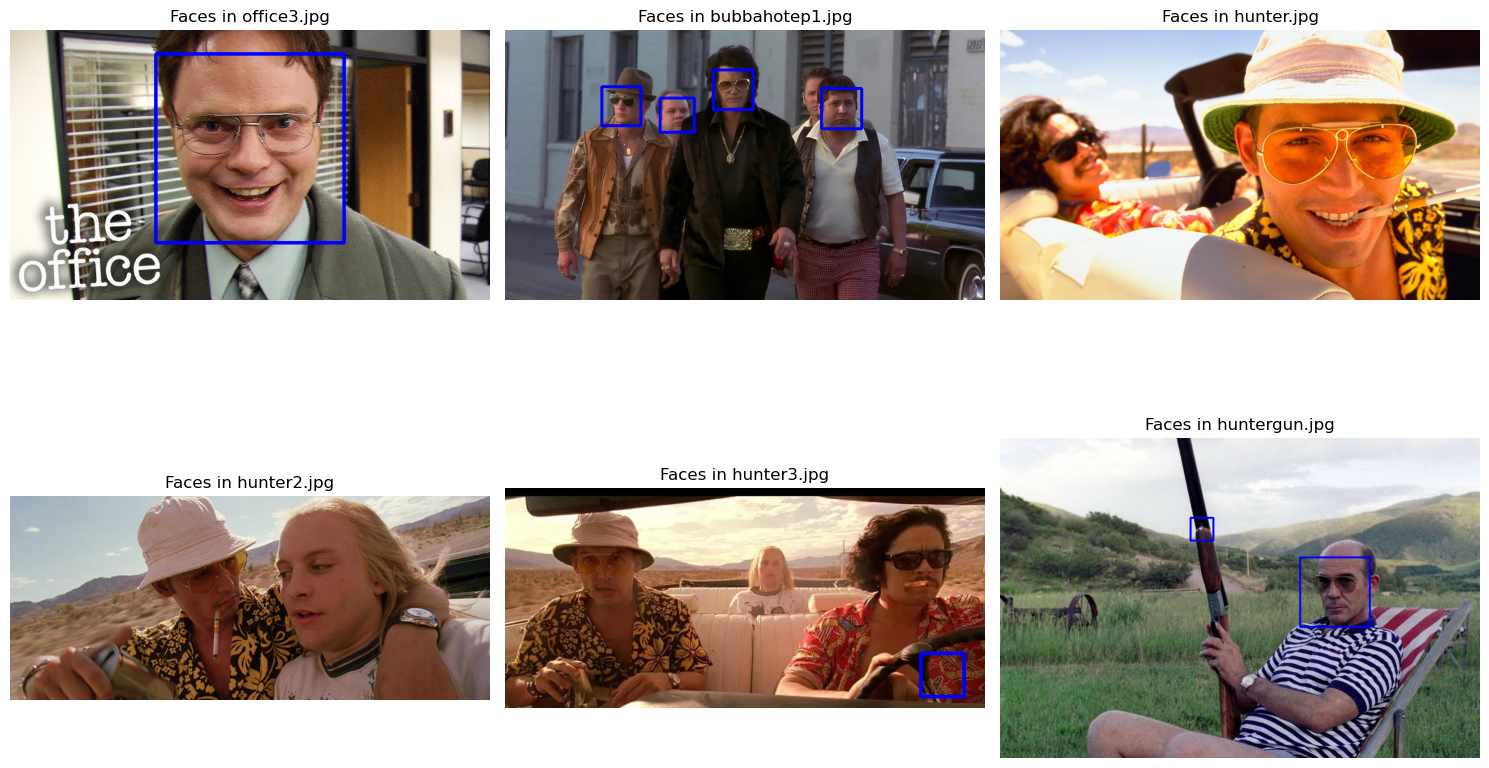

In [49]:
from deepface import DeepFace

image_paths = [
    "img/office3.jpg",   
    "img/bubbahotep1.jpg", 
    "img/hunter.jpg",    
    "img/hunter2.jpg",  
    "img/hunter3.jpg",  
    "img/huntergun.jpg"   
    # "img/hunterdownpng.jpg"   
]

# Create a plot to display all images with detected faces
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows, 3 columns

# Loop over each image
for i, image_path in enumerate(image_paths):
    # Loading the image
    img = cv2.imread(image_path)

    # Convert the image to grayscale (required for OpenCV face detector)
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Load the OpenCV face detector
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Detect faces in the image
    faces = face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Check how many faces OpenCV found
    print(f"Number of faces detected in {image_path}: {len(faces)}")

    # Draw bounding boxes around the faces
    img_with_faces = img.copy()
    for (x, y, w, h) in faces:
        cv2.rectangle(img_with_faces, (x, y), (x + w, y + h), (255, 0, 0), 3)  # Blue color for bounding box

    # Display the image with faces highlighted
    ax = axes[i // 3, i % 3]  # Determine the position in the subplot grid
    ax.imshow(cv2.cvtColor(img_with_faces, cv2.COLOR_BGR2RGB))
    ax.axis('off')
    ax.set_title(f"Faces in {image_path.split('/')[-1]}") 

plt.tight_layout()
plt.show()